In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
url = "../data/raw/telecom_churn.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

# NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.utils import to_categorical
## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
from sklearn.metrics import RocCurveDisplay

In [6]:
scaler = StandardScaler().fit(df.drop("Churn",axis=1))


In [7]:
X = scaler.transform(df.drop("Churn",axis=1))
y = df["Churn"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20,random_state=0)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       579
           1       0.78      0.58      0.67        88

    accuracy                           0.92       667
   macro avg       0.86      0.78      0.81       667
weighted avg       0.92      0.92      0.92       667



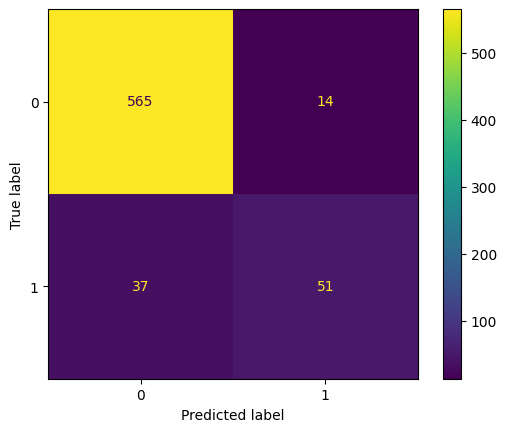

In [9]:
clf = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=50)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       579
           1       0.80      0.72      0.75        88

    accuracy                           0.94       667
   macro avg       0.88      0.84      0.86       667
weighted avg       0.94      0.94      0.94       667



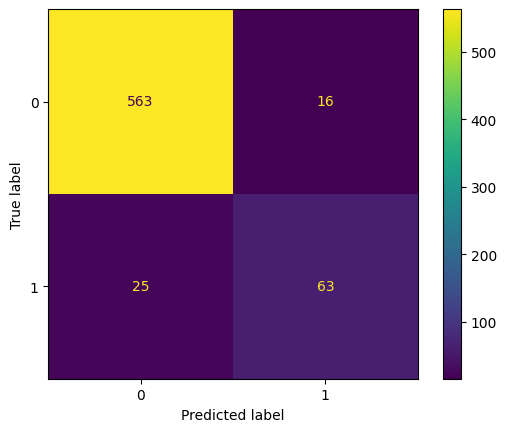

In [10]:
clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(X_train, y_train)

pr = clfr.predict(X_test)
print(classification_report(y_test, pr))

cm = confusion_matrix(y_test, pr, labels=clfr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clfr.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       579
           1       0.81      0.72      0.76        88

    accuracy                           0.94       667
   macro avg       0.88      0.85      0.86       667
weighted avg       0.94      0.94      0.94       667



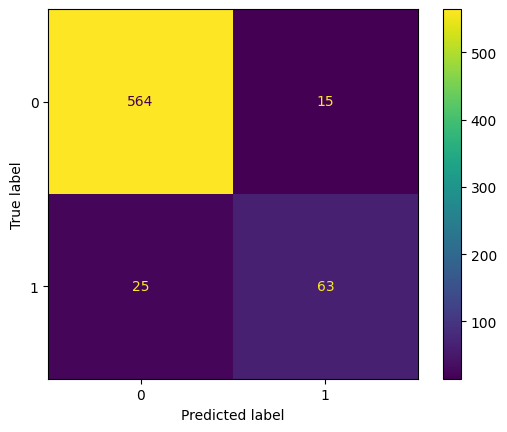

In [11]:
clfg = GradientBoostingClassifier(n_estimators=150, random_state=0)
clfg.fit(X_train, y_train)

pg = clfg.predict(X_test)
print(classification_report(y_test, pg))

cm = confusion_matrix(y_test, pg, labels=clfg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clfr.classes_)
disp.plot()
plt.show()

In [12]:
hyperparams = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [13]:
rf_model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rf_model, param_grid = hyperparams, cv = 5, n_jobs = -1, verbose = 1, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [14]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}

In [15]:
grid_search.best_score_

0.9377314473231163

In [16]:
rf_best = grid_search.best_estimator_
rf_model = rf_best.fit(X_train, y_train)
pred = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       579
           1       0.84      0.73      0.78        88

    accuracy                           0.95       667
   macro avg       0.90      0.85      0.87       667
weighted avg       0.94      0.95      0.94       667



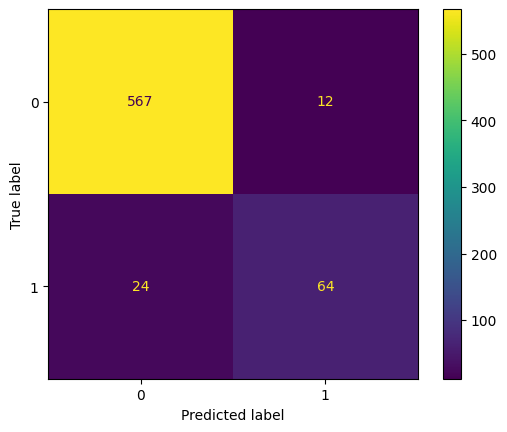

In [17]:
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred, labels=rf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_best.classes_)
disp.plot()
plt.show()

In [18]:
rf_best.classes_

array([0, 1], dtype=int64)

In [19]:
import pickle

# Save the model to a file
with open('../models/GradientBoostingClassifier_for_telcomData.pkl', 'wb') as file:
    pickle.dump(clfg, file)